# Team One: The Opioid Crisis in the United States

### Analysis
* OBSERVED TREND For Research Question 1: 
* OBSERVED TREND For Research Question 2: 
* OBSERVED TREND For Research Question 3: 
* OBSERVED TREND For Research Question 3: 


###### Development team notes and caveats:
* 

#### Dependencies

In [1]:
import numpy as np                                                           # numpy library

In [2]:
import pandas as pd                                                          # pandas library

In [3]:
import matplotlib.pyplot as plt                                              # pyplot module from matplotlib library

In [4]:
import matplotlib.patches as mpatches                                        # patches module from matplotlib library

In [5]:
import seaborn as sns                                                        # seaborn library

In [6]:
from citipy import citipy                                                    # citipy module from citipy library

In [7]:
import requests                                                              # requests library

In [8]:
from datetime import datetime                                                # datetime module from datetime library

In [9]:
import time                                                                  # time library, api call compliance

In [10]:
sns.set()                                                                    # switches to seaborn default display

#### Research Question 1

#### Research Question 2

#### Research Question 3
#### Impact of the opioid epidemic
Are urban areas impacted more by the opioid epidemic? Scatterplot of Urban vs. not urban 

In [11]:

# import datasets
csv_OpDeaths = r'Data Files/raw_data-KFF_opioid_death_csv.csv' 
csv_UrbPop = r'Data Files/pop-urban-pct-historical_cleaned_up.csv'

# Read in the csv files, skipping titles and footer notes
OpDeaths_df = pd.read_csv(csv_OpDeaths, engine='python', skiprows=[0, 1], skipfooter=13) 
UrbPop_df = pd.read_csv(csv_UrbPop, engine='python', skipfooter=7)


# change NSD and NR into NaN
OpDeaths_df = OpDeaths_df.replace(['NSD', 'NR'], np.nan)

OpDeaths_df.tail()



,Location,1999__Opioid Overdose Death Rate (Age-Adjusted),2000__Opioid Overdose Death Rate (Age-Adjusted),2001__Opioid Overdose Death Rate (Age-Adjusted),2002__Opioid Overdose Death Rate (Age-Adjusted),2003__Opioid Overdose Death Rate (Age-Adjusted),2004__Opioid Overdose Death Rate (Age-Adjusted),2005__Opioid Overdose Death Rate (Age-Adjusted),2006__Opioid Overdose Death Rate (Age-Adjusted),2007__Opioid Overdose Death Rate (Age-Adjusted),2008__Opioid Overdose Death Rate (Age-Adjusted),2009__Opioid Overdose Death Rate (Age-Adjusted),2010__Opioid Overdose Death Rate (Age-Adjusted),2011__Opioid Overdose Death Rate (Age-Adjusted),2012__Opioid Overdose Death Rate (Age-Adjusted),2013__Opioid Overdose Death Rate (Age-Adjusted),2014__Opioid Overdose Death Rate (Age-Adjusted),2015__Opioid Overdose Death Rate (Age-Adjusted)
47,Virginia,2.7,3.4,4.2,4.7,4.8,5.1,4.7,5.3,6.4,6.2,5.9,4.8,7.1,6.5,7.6,9.1,9.9
48,Washington,5.9,5.8,5.3,7.4,7.5,9,9.2,10,9.7,10.1,10.2,8.9,9.9,9.7,8.9,9.2,9.3
49,West Virginia,1.8,2.8,7.9,10.1,11.2,14.2,8.2,16.1,19,21.0,10.3,25.6,31.5,27.1,27.9,31.6,36.0
50,Wisconsin,1.6,2.1,2.6,3.2,3.7,4,4.9,6,6.7,6.6,6.9,7.3,8.3,8.6,10.6,11.1,11.2
51,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.6,7.6,5.7,8.5,7.5,7.7,8.6,9.3,7.9


In [12]:
# preparing UrbPop_df for merging and making sure there are 52 entries (50 states + DC + US overall)
UrbPop_df = UrbPop_df.rename(columns={'Area Name':'Location'}) 
UrbPop_df.tail()

,FIPS,Location,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
47,51,Virginia,18.3,23.1,29.2,32.4,35.3,47.0,55.6,63.2,66.0,69.4,73.0,75.5
48,53,Washington,40.8,53.0,54.8,56.6,53.1,63.2,68.1,73.4,73.5,76.4,82.0,84.1
49,54,West Virginia,13.1,18.7,25.2,28.4,28.1,34.6,38.2,39.1,36.2,36.1,46.1,48.7
50,55,Wisconsin,38.2,43.0,47.3,52.9,53.5,57.9,63.8,65.9,64.2,65.7,68.3,70.2
51,56,Wyoming,28.8,29.6,29.4,31.1,37.3,49.8,56.8,60.5,62.7,65.0,65.1,64.8


In [13]:
# merging UrbPop_df and OpDeaths_df. This ensures that the data matches for each state. 
OpDeaths_Urb_df = pd.merge(OpDeaths_df, UrbPop_df, on='Location')

OpDeaths_Urb_df.head()

,Location,1999__Opioid Overdose Death Rate (Age-Adjusted),2000__Opioid Overdose Death Rate (Age-Adjusted),2001__Opioid Overdose Death Rate (Age-Adjusted),2002__Opioid Overdose Death Rate (Age-Adjusted),2003__Opioid Overdose Death Rate (Age-Adjusted),2004__Opioid Overdose Death Rate (Age-Adjusted),2005__Opioid Overdose Death Rate (Age-Adjusted),2006__Opioid Overdose Death Rate (Age-Adjusted),2007__Opioid Overdose Death Rate (Age-Adjusted),...,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010
0,United States,2.9,3,3.3,4.1,4.5,4.7,5.1,5.9,6.1,...,51.2,56.1,56.5,64.0,69.9,73.6,73.7,75.2,79.0,80.7
1,Alabama,0.8,1,1.3,1.6,1.1,1.8,1.8,2.7,3.6,...,21.7,28.1,30.2,43.8,54.8,58.6,60.0,60.4,55.4,59.0
2,Alaska,4,4,NaN,NaN,NaN,NaN,NaN,4.1,NaN,...,5.6,13.2,24.0,26.6,37.9,56.9,64.3,67.5,65.6,66.0
3,Arizona,4.7,4.8,5.2,6.2,6.4,6.3,6.6,7.8,7.7,...,36.1,34.4,34.8,55.5,74.5,79.6,83.8,87.5,88.2,89.8
4,Arkansas,1.1,0.8,1.1,3.5,3.4,4.8,4.6,5.1,5.4,...,16.6,20.6,22.2,33.0,42.8,50.0,51.6,53.5,52.5,56.2


In [40]:
# dfs for the years 2000 and 2010 (the years where census data is available):
# df Opioid deaths 2000
Op_2000_df = pd.DataFrame(\
                          data = OpDeaths_Urb_df,\
                          columns=['Location', '2000__Opioid Overdose Death Rate (Age-Adjusted)', '2000'])
Op_2000_df = Op_2000_df.dropna()
Op_2000_df = Op_2000_df.drop(Op_2000_df.index[0]) #dropping US total
# For some reason, Opioid Death rate is not numeric. Change to numeric so scatter plot works 
Op_2000_df['2000__Opioid Overdose Death Rate (Age-Adjusted)'] = Op_2000_df['2000__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)

# df Opioid deaths 2010
Op_2010_df = pd.DataFrame(\
                          data = OpDeaths_Urb_df,\
                          columns=['Location', '2010__Opioid Overdose Death Rate (Age-Adjusted)', '2010'])
Op_2010_df = Op_2010_df.dropna()
Op_2010_df = Op_2010_df.drop(Op_2010_df.index[0]) #dropping US total
# For some reason, Opioid Death rate is not numeric. Change to numeric so scatter plot works 
Op_2010_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'] = Op_2010_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'].apply(pd.to_numeric)

Op_2010_df.head()

,Location,2010__Opioid Overdose Death Rate (Age-Adjusted),2010
1,Alabama,4.1,59.0
2,Alaska,8.7,66.0
3,Arizona,9.9,89.8
4,Arkansas,6.8,56.2
5,California,5.0,95.0


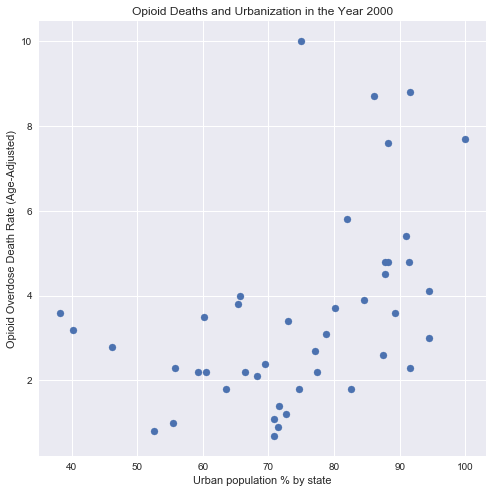

In [43]:
# scatterplot: Urban population % by state in year 2000 on opioid overdose death rate in year 2000 

plt.figure(figsize=(8, 8))
plt.scatter(x=Op_2000_df['2000'], y=Op_2000_df['2000__Opioid Overdose Death Rate (Age-Adjusted)'])

# set titles and labels
plt.title('Opioid Deaths and Urbanization in the Year 2000')
plt.xlabel('Urban population % by state')
plt.ylabel('Opioid Overdose Death Rate per 100,000 (Age-Adjusted)')
plt.show()

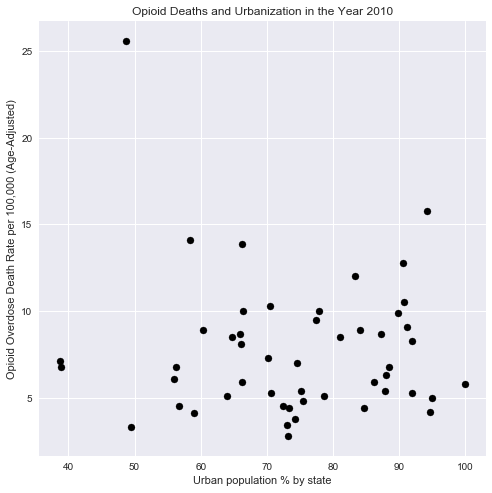

In [44]:
# scatterplot: Urban population % by state in year 2010 on opioid overdose death rate in year 2010 
plt.figure(figsize=(8, 8))
plt.scatter(x=Op_2010_df['2010'], y=Op_2010_df['2010__Opioid Overdose Death Rate (Age-Adjusted)'], c='black')

# set titles and labels
plt.title('Opioid Deaths and Urbanization in the Year 2010')
plt.xlabel('Urban population % by state')
plt.ylabel('Opioid Overdose Death Rate per 100,000 (Age-Adjusted)')
plt.show()

#### Research Question 4